In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b20a51962f34dec5e2ab6dd519585922


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | todos santos
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | olymskiy
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | chupei
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | makakilo city
Processing Record 11 of Set 1 | skagen
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | bahia blanca
Processing Record 15 of Set 1 | marcona
City not found. Skipping...
Processing Record 16 of Set 1 | zholymbet
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tongren
Processing Record 19 of Set 1 | 

Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | nieuw amsterdam
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | canico
Processing Record 41 of Set 4 | murgab
Processing Record 42 of Set 4 | cururupu
Processing Record 43 of Set 4 | kurumkan
Processing Record 44 of Set 4 | mill valley
Processing Record 45 of Set 4 | lasa
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | kapaa
Processing Record 48 of Set 4 | yamaga
Processing Record 49 of Set 4 | meulaboh
Processing Record 50 of Set 4 | khudumelapye
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | mildura
Processing Record 3 of Set 5 | mae hong son
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | grand forks
Processing Record 6 of Set 5 | shiyan
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 of Set 5 | corinto
Processing Record 9 of Set 5 | bodmin
Pro

Processing Record 29 of Set 8 | tupik
Processing Record 30 of Set 8 | minbu
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | phumi samraong
City not found. Skipping...
Processing Record 33 of Set 8 | mentok
City not found. Skipping...
Processing Record 34 of Set 8 | warri
Processing Record 35 of Set 8 | nushki
Processing Record 36 of Set 8 | mayskiy
Processing Record 37 of Set 8 | finote selam
Processing Record 38 of Set 8 | tando ghulam ali
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | gladstone
Processing Record 41 of Set 8 | green valley
Processing Record 42 of Set 8 | tyumentsevo
Processing Record 43 of Set 8 | ravar
Processing Record 44 of Set 8 | bambous virieux
Processing Record 45 of Set 8 | muleba
Processing Record 46 of Set 8 | severo-kurilsk
Processing Record 47 of Set 8 | pukhrayan
Processing Record 48 of Set 8 | yulara
Processing Record 49 of Set 8 | jijiga
Processing Record 50 of Set 8 | teguise
Processing Record 1 of Set 9 |

Processing Record 14 of Set 12 | saint-gaudens
Processing Record 15 of Set 12 | namatanai
Processing Record 16 of Set 12 | abbeville
Processing Record 17 of Set 12 | bato
Processing Record 18 of Set 12 | ahipara
Processing Record 19 of Set 12 | san javier
Processing Record 20 of Set 12 | santa fe
Processing Record 21 of Set 12 | saint-georges
Processing Record 22 of Set 12 | tutayev
Processing Record 23 of Set 12 | atambua
Processing Record 24 of Set 12 | miracema do tocantins
Processing Record 25 of Set 12 | necochea
Processing Record 26 of Set 12 | palm coast
Processing Record 27 of Set 12 | yirol
City not found. Skipping...
Processing Record 28 of Set 12 | bay-khaak
Processing Record 29 of Set 12 | nyurba
Processing Record 30 of Set 12 | chipata
Processing Record 31 of Set 12 | ust-kut
Processing Record 32 of Set 12 | barguzin
Processing Record 33 of Set 12 | namibe
Processing Record 34 of Set 12 | zhezkazgan
Processing Record 35 of Set 12 | altar
Processing Record 36 of Set 12 | ma

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,65.44,87,85,3.24,BR,2021-04-17 20:16:23
1,Todos Santos,23.4500,-110.2167,66.99,77,0,5.99,MX,2021-04-17 20:18:42
2,Albany,42.6001,-73.9662,50.00,52,100,6.89,US,2021-04-17 20:18:42
3,Atuona,-9.8000,-139.0333,80.31,76,32,18.88,PF,2021-04-17 20:15:15
4,Ushuaia,-54.8000,-68.3000,60.80,39,40,13.80,AR,2021-04-17 20:15:30
5,Makakilo City,21.3469,-158.0858,78.80,57,1,10.36,US,2021-04-17 20:18:43
6,Skagen,57.7209,10.5839,51.01,52,81,5.01,DK,2021-04-17 20:18:43
7,Grand Gaube,-20.0064,57.6608,79.00,86,20,9.24,MU,2021-04-17 20:18:42
8,Bahia Blanca,-38.7196,-62.2724,74.57,62,54,5.64,AR,2021-04-17 20:18:44
9,Zholymbet,51.7433,71.7122,42.84,79,24,6.06,KZ,2021-04-17 20:18:44


In [11]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-04-17 20:16:23,-24.7911,-50.0119,65.44,87,85,3.24
1,Todos Santos,MX,2021-04-17 20:18:42,23.4500,-110.2167,66.99,77,0,5.99
2,Albany,US,2021-04-17 20:18:42,42.6001,-73.9662,50.00,52,100,6.89
3,Atuona,PF,2021-04-17 20:15:15,-9.8000,-139.0333,80.31,76,32,18.88
4,Ushuaia,AR,2021-04-17 20:15:30,-54.8000,-68.3000,60.80,39,40,13.80
5,Makakilo City,US,2021-04-17 20:18:43,21.3469,-158.0858,78.80,57,1,10.36
6,Skagen,DK,2021-04-17 20:18:43,57.7209,10.5839,51.01,52,81,5.01
7,Grand Gaube,MU,2021-04-17 20:18:42,-20.0064,57.6608,79.00,86,20,9.24
8,Bahia Blanca,AR,2021-04-17 20:18:44,-38.7196,-62.2724,74.57,62,54,5.64
9,Zholymbet,KZ,2021-04-17 20:18:44,51.7433,71.7122,42.84,79,24,6.06


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

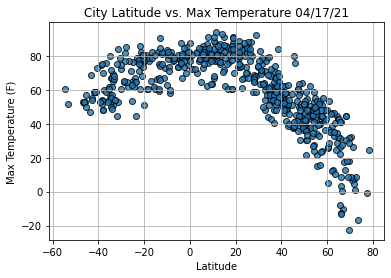

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

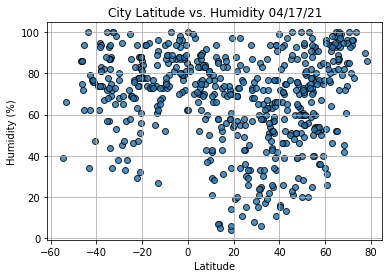

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

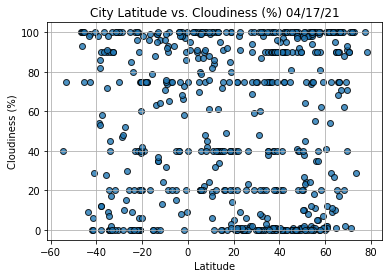

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

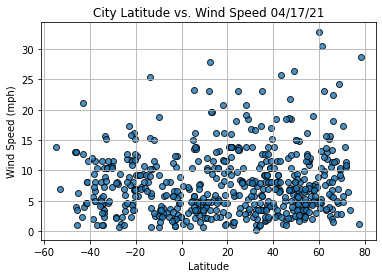

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()